# Introdução

O [Rate Your Music](https://rateyourmusic.com/) é uma comunidade online para fãs de música e também serve como um excelente catálogo de músicas. Hipsters de todas as idades amam esse site, e não é por acaso. Há diversas formas para descobrir e conhecer músicas e artistas novos dentro do site. E isso é o que faz dele interessante e tão utilizado.

Pessoalmente, gosto como os gêneros são bem detalhados para cada álbum e são dados diversos "descritores" para eles: se o álbum é ritmico, se é introspectivo, depressivo, animado e tantos outros.

Tive então a ideia de fazer um *scrap* no chart de albums mais bem avaliados de todos os tempos no site. O objetivo é conhecer um pouco dos gosto dos usuários do site, que apesar de já seguirem um certo esteriotipo, é interessante ver se esse esteriotipo se materializa nos dados.

## Carregando os dados

In [1]:
import re
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
rym_df = pd.read_csv("../data/rym_top1000_chart.csv")

In [3]:
rym_df.head()

,position,artist,album,release_date,primary_genres,secondary_genres,descriptors,number_ratings,number_reviews,avg_rating,id_spotify
0,1,Radiohead,OK Computer,16 June 1997,"Alternative Rock, Art Rock",Space Rock Revival,"melancholic, anxious, futuristic, male vocals,...","76,616","1,564",4.24,7dxKtc08dYeRVHt3p9CZJn
1,2,Kendrick Lamar,To Pimp a Butterfly,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","Political Hip Hop, Neo-Soul, Funk, Poetry","political, conscious, concept album, poetic, p...","51,235",433,4.31,7ycBtnsMtyVbbwTfJwRjSP
2,3,Pink Floyd,Wish You Were Here,12 September 1975,"Progressive Rock, Art Rock",Space Rock,"melancholic, atmospheric, progressive, male vo...","52,941","1,016",4.30,0bCAjiUamIFqKJsekOYuRw
3,4,King Crimson,In the Court of the Crimson King,10 October 1969,"Progressive Rock, Art Rock","Symphonic Prog, Jazz-Rock, Free Improvisation,...","fantasy, epic, progressive, complex, philosoph...","48,905",845,4.30,5wec5BciMpDMzlEFpYeHse
4,5,Radiohead,Kid A,3 October 2000,"Art Rock, Experimental Rock, Electronic","Ambient, IDM, Electronic, Art Pop","cold, melancholic, futuristic, atmospheric, an...","63,660",765,4.23,19RUXBFyM4PpmrLRdtqWbp


As colunas em geral são autoexplicativas. Contém colunas para a posição do album, o nome do artista, do album, da data de lançamento e algumas características do album como gêneros primários e secundários e descritores. Além disso, temos o número de avaliações, o número de reviews, a avaliação média e o id do spotify.

Uma coisa a se observar é que a avaliação média não segue uma ordem decrescente. Por exemplo: OK Computer, o álbum melhor avaliado, tem uma avaliação média menor que o segundo álbum melhor avaliado, To Pimp a Butterfly. Isso é normal do site, em que os *charts* são definidos por uma serie de fatores, incluindo pesos dados a avaliação e a popularidade no geral. O álgoritimo usado pelo site não é deixado em público para evitar manipulação. Melhores explicações são encontradas [aqui](https://rateyourmusic.com/wiki/RYM:Charts%20FAQ).



Podemos responder algumas perguntas sobre o chart top 1000 do Rate Your Music. Por exemplo, quais são os 10 artistas que mais aparecem no top 1000?

<AxesSubplot:xlabel='n', ylabel='artist'>

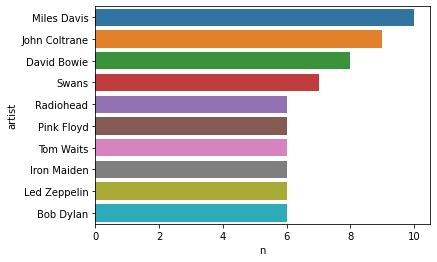

In [4]:
top_10_artists = rym_df["artist"].value_counts()[:10].reset_index().rename(columns={"index": "artist", "artist": "n"})
sns.barplot(x="n", y="artist", data=top_10_artists)

Miles Davis é o artista que mais aparece no top 1000 do Rate Your Music, com 10 aparições. Seguido por John Coltrane com 9, David Bowie com 8, Swans com 7 e o restante com 6.

Pelos 10 artistas que mais aparecem no top 1000 do RYM, parece haver uma tendência a preferir artistas mais antigos. Como isso se traduz na evolução das avaliações durante os anos? Realmente existe esse "viés"?

In [5]:
def date_to_year(dt):
    year_pt = re.compile("\d{4}")
    year = int(year_pt.findall(dt)[0])
    return year

rym_df["year"] = rym_df["release_date"].apply(date_to_year)
rym_df["decade"] = rym_df["year"].apply(lambda y: y // 10 * 10)

In [6]:
decades_by_rating = rym_df.groupby("decade")[["avg_rating"]].mean().reset_index()

In [7]:
decades_by_rating

,decade,avg_rating
0,1950,3.936087
1,1960,3.958000
2,1970,3.933828
3,1980,3.905612
4,1990,3.920727
5,2000,3.904755
6,2010,3.889857
7,2020,3.876429


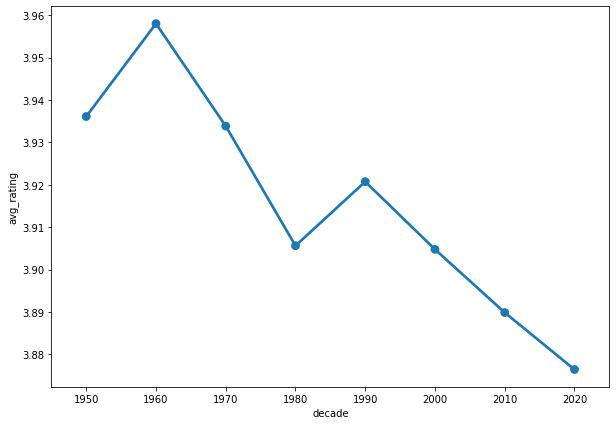

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(x="decade", y="avg_rating", data=decades_by_rating, ax=ax)
sns.pointplot(x="decade", y="avg_rating", data=decades_by_rating, ax=ax)
plt.show()

TODO: Formatar datas, primary and secondary genres and descriptors

In [54]:
rym_df["artist"].value_counts()[:10]

Miles Davis      15
Bob Dylan        13
John Coltrane    11
David Bowie      10
King Crimson      8
Swans             8
Led Zeppelin      8
Pink Floyd        7
Grateful Dead     7
Iron Maiden       7
Name: artist, dtype: int64

Precisamos ajeitar algumas colunas.

Para nosso propositos não precisaremos da data completa em que o album foi lançado, só vamos querer a década.

Para isso, podemos criar uma simples função que captura o padrão do ano (4 digitos seguidos) e aplica um pequeno truque pra obter a decada.

<AxesSubplot:xlabel='decade', ylabel='avg_rating'>

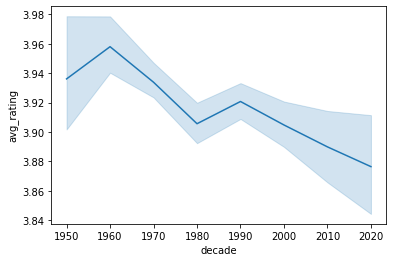

In [11]:
sns.lineplot(x="decade", y="avg_rating", data=rym_df)

<AxesSubplot:xlabel='decade', ylabel='avg_rating'>

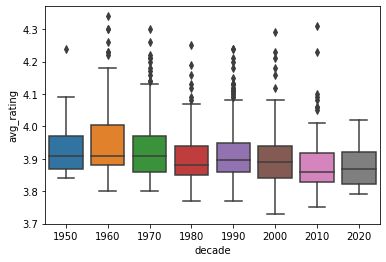

In [9]:
sns.boxplot(x="decade", y="avg_rating", data=rym_df)

In [10]:
rym_df.groupby(["decade"])["avg_rating"].agg(["mean", "std"])

,mean,std
decade,,
1950,3.936087,0.094952
1960,3.958000,0.114942
1970,3.933828,0.094898
1980,3.905612,0.082875
1990,3.920727,0.090717
2000,3.904755,0.092583
2010,3.889857,0.105960
2020,3.876429,0.065704


In [24]:
?WordCloud

In [14]:
prim_genres = []
for pg in rym_df["primary_genres"]:
    pg_split = pg.split(", ")
    prim_genres += pg_split
prim_genres_freq = Counter(prim_genres)

In [33]:
1.67*700

1169.0

In [34]:
wc = WordCloud(background_color="white", width=1169, height=700).generate_from_frequencies(prim_genres_freq)

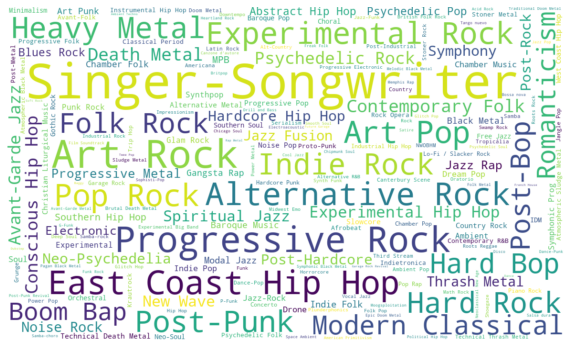

In [42]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
plt.show()

In [18]:
sec_genres = []
for sg in rym_df["secondary_genres"].dropna():
    sg_split = sg.split(", ")
    sec_genres += sg_split
sec_genres_freq = Counter(sec_genres)

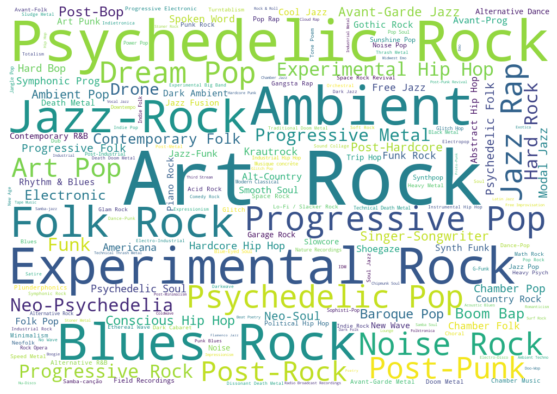

In [20]:
wc = WordCloud(background_color="white", width=1000, height=700).generate_from_frequencies(sec_genres_freq)
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
plt.show()

In [21]:
dcs = []
for dc in rym_df["descriptors"].dropna():
    dc_split = dc.split(", ")
    dcs += dc_split
dcs_freq = Counter(dcs)

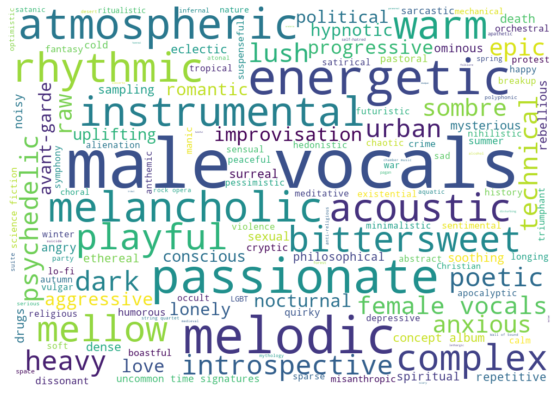

In [23]:
wc = WordCloud(background_color="white", width=1000, height=700).generate_from_frequencies(dcs_freq)
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
plt.show()

In [116]:
list_of_genres = []
for g in rym_df["secondary_genres"].dropna():
    g_split = g.split(", ")
    list_of_genres += [g_strip.strip() for g_strip in g_split]

In [117]:
375 + 170 + 280

825

In [118]:
len(set(list_of_genres))

375

In [119]:
len(set(list_of_genres))

375

In [120]:
len(set(list_of_genres))

375

In [121]:
rym_df["secondary_genres"].value_counts()

Hard Rock                                                                           10
Progressive Metal                                                                    9
Blues Rock                                                                           8
Post-Punk                                                                            6
Folk Rock                                                                            6
                                                                                    ..
Acid Jazz, Psychedelic Rock                                                          1
Experimental Rock, Folk Rock, Psychedelic Pop, Neo-Psychedelia, Progressive Rock     1
Chamber Pop, Jazz Pop, Progressive Pop, J-Rock, Noise Pop                            1
Avant-Garde Jazz, Jazz-Funk, Experimental Big Band                                   1
Punk Rock, Noise Rock, Post-Hardcore                                                 1
Name: secondary_genres, Length: 702, dtype:

In [122]:
rym_df["artist"].value_counts()[:10]

Miles Davis      15
Bob Dylan        13
John Coltrane    11
David Bowie      10
King Crimson      8
Swans             8
Led Zeppelin      8
Pink Floyd        7
Grateful Dead     7
Iron Maiden       7
Name: artist, dtype: int64

In [123]:
teste = rym_df.copy()

In [126]:
teste["date"] = teste["release_date"].str.replace("Live", "").str.replace("Archival", "").str.strip()

In [127]:
teste["anos"] = teste["release_date"].str.extract(r"(\d{4})")

In [98]:
import numpy as np

In [112]:
1925//10*10

1920

In [128]:
teste

,position,artist,album,release_date,primary_genres,secondary_genres,descriptors,number_ratings,number_reviews,avg_rating,id_spotify,date,anos
0,1,Radiohead,OK Computer,16 June 1997,"Alternative Rock, Art Rock",Space Rock Revival,"melancholic, anxious, futuristic, male vocals,...","76,616","1,564",4.24,7dxKtc08dYeRVHt3p9CZJn,16 June 1997,1997
1,2,Kendrick Lamar,To Pimp a Butterfly,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","Political Hip Hop, Neo-Soul, Funk, Poetry","political, conscious, concept album, poetic, p...","51,235",433,4.31,7ycBtnsMtyVbbwTfJwRjSP,15 March 2015,2015
2,3,Pink Floyd,Wish You Were Here,12 September 1975,"Progressive Rock, Art Rock",Space Rock,"melancholic, atmospheric, progressive, male vo...","52,941","1,016",4.30,0bCAjiUamIFqKJsekOYuRw,12 September 1975,1975
3,4,King Crimson,In the Court of the Crimson King,10 October 1969,"Progressive Rock, Art Rock","Symphonic Prog, Jazz-Rock, Free Improvisation,...","fantasy, epic, progressive, complex, philosoph...","48,905",845,4.30,5wec5BciMpDMzlEFpYeHse,10 October 1969,1969
4,5,Radiohead,Kid A,3 October 2000,"Art Rock, Experimental Rock, Electronic","Ambient, IDM, Electronic, Art Pop","cold, melancholic, futuristic, atmospheric, an...","63,660",765,4.23,19RUXBFyM4PpmrLRdtqWbp,3 October 2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Klaus Schulze,"""X""",September 1978,Berlin School,"Ambient, Modern Classical","concept album, atmospheric, progressive, instr...","2,826",54,3.86,4M8LtVeYa55bP7jkKvFrx9,September 1978,1978
996,997,Iced Earth,Alive in Athens,19 July 1999 Live,"Power Metal, US Power Metal, Heavy Metal",Thrash Metal,"epic, heavy, mythology, energetic, male vocals","1,103",44,3.99,5f4Jvsa1R9W3oiEv6B9moT,19 July 1999,1999
997,998,Nirvana,Live at the Paramount,12 April 2019 Archival Live,Grunge,"Punk Rock, Noise Rock, Post-Hardcore","energetic, male vocals, heavy, raw, aggressive...",702,8,4.03,5A7qhg1w3J1GVoPPTChYCF,12 April 2019,2019
998,999,Ludwig van Beethoven / Berliner Philharmoniker...,Symphonie Nr. 7,1962,"Symphony, Romanticism",NaN,"symphony, instrumental, orchestral, acoustic, ...",445,NaN,3.89,2KSJA9WWEs5XtFORmIAdeU,1962,1962
